# Model-Free Prediction and Control
### This Jupyter Notebook is created for visualization purposes

#### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Courier New"
import copy

from maze_class import Maze
from monte_carlo import *
from td_learning import *
from plot_functions import plot_grid, q_table, plot_q_table

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Monte Carlo

#### Initialise parameters

In [2]:
MAX_EP = 3000
STEP_COST = -0.1
MAX_EP_LEN = 30

maze_coords = {
    "[0, 0]": 0, "[0, 1]": 1, "[0, 2]": 2, "[0, 3]": 3,
    "[1, 0]": 4, "[1, 1]": 5, "[1, 2]": 6, "[1, 3]": 7,
    "[2, 0]": 8, "[2, 1]": 9, "[2, 2]": 10, "[2, 3]": 11,
    "[3, 0]": 12, "[3, 1]": 13, "[3, 2]": 14, "[3, 3]": 15
}

reversed_maze = {
    "0": [0, 0], "1": [0, 1], "2": [0, 2], "3": [0, 3],
    "4": [1, 0], "5": [1, 1], "6": [1, 2], "7": [1, 3],
    "8": [2, 0], "9": [2, 1], "10": [2, 2], "11": [2, 3],
    "12": [3, 0], "13": [3, 1], "14": [3, 2], "15": [3, 3],
}

#### Evironment

In [3]:
env = Maze(maze_coords,reversed_maze, step_cost=STEP_COST, max_ep_length=MAX_EP_LEN)

#### Visualize rewards

#### Factor 1

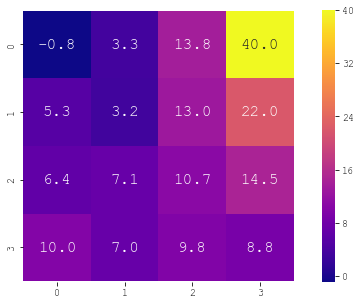

In [4]:
policy_eval1 = mc_evaluation_policy(env, discount_factor=1)
plot_grid(policy_eval1.reshape((4,4)))

#### Factor 0.9

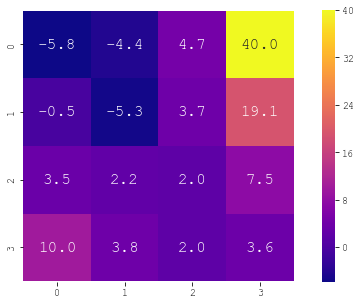

In [5]:
policy_eval2 = mc_evaluation_policy(env, discount_factor=0.9)
plot_grid(policy_eval2.reshape((4,4)))

## TD Learning

#### Factor 1

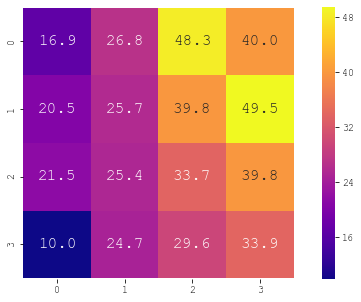

In [6]:
policy_eval1 = td_learning(env, discount_factor=1)
plot_grid(policy_eval1.reshape((4,4)))

#### Factor 0.9

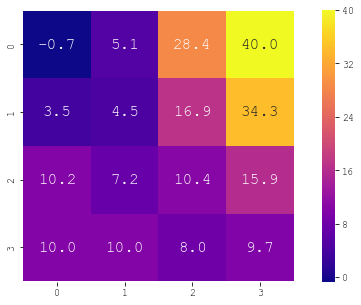

In [7]:
policy_eval2 = td_learning(env, discount_factor=0.9)
plot_grid(policy_eval2.reshape((4,4)))

## On-policy first-visit Monte-Carlo Control

#### Initialize rewards lists 

In [8]:
rewards = rewards_lists(16,4)

#### Visualize Q-Table

#### Factor 1

In [9]:
# Factor 1
grid_values = first_visit_mc(env=env, max_ep=MAX_EP, discount_factor=1, rewards=rewards)
print(grid_values)

[[ -1.2          4.83333333   0.          -1.03333333]
 [ -8.675       27.35555556 -22.4          3.3       ]
 [ 16.82666667  40.          38.5        -10.46      ]
 [ 40.          40.          40.          40.        ]
 [ -0.4         -0.6          0.           5.26      ]
 [ 10.4         36.590625    26.97222222   9.43333333]
 [ 23.375       37.76764706  38.25830816  30.7826087 ]
 [ 40.          39.64261364  39.43487179  37.4345679 ]
 [ -4.46666667  19.03333333  10.           9.88      ]
 [ 30.944       37.05        33.97566138   9.48780488]
 [ 36.47712766  39.20913642  38.07840909  31.47058824]
 [ 39.71312527  38.53709677  36.09268293  37.52406417]
 [ 10.          10.          10.          10.        ]
 [ 26.68275862  37.70461095  32.47826087  10.        ]
 [ 38.4169237   37.1746988   37.6516129   32.80652174]
 [ 31.978       35.804       35.66631579  38.        ]]


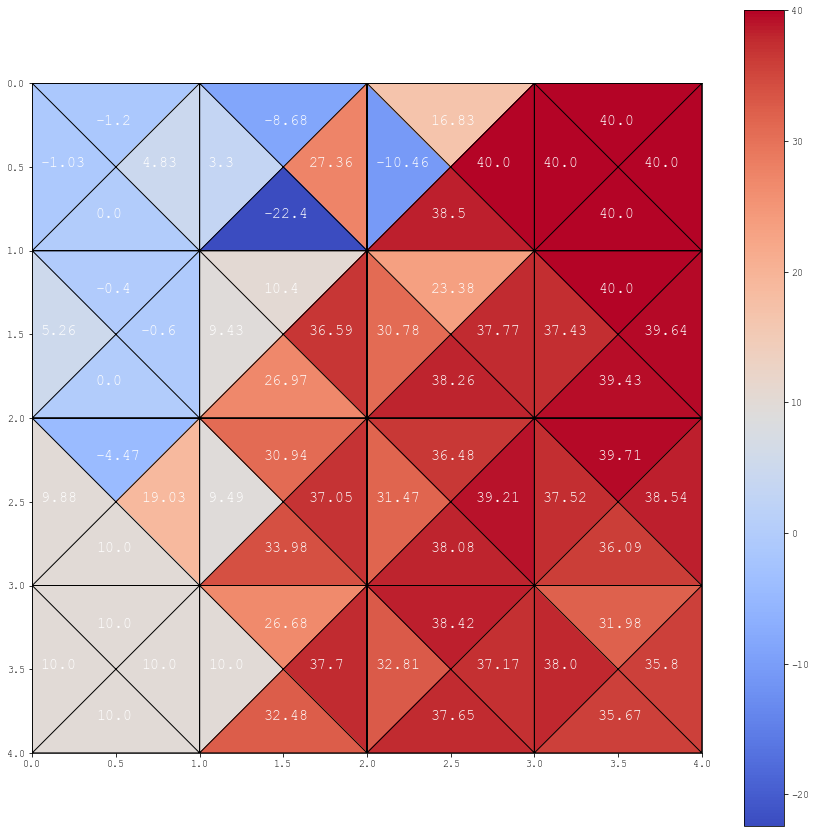

In [10]:
plot_q_table(grid_values)

#### Factor 0.99

In [11]:
# Factor 0.9
grid_values_2 = first_visit_mc(env=env, max_ep=MAX_EP, discount_factor=0.9, rewards=rewards)
print(grid_values_2)

[[ -0.95878523   0.           0.           0.        ]
 [-14.37848727  19.01837624   0.           0.        ]
 [ 12.87117856  40.          24.87816669  -2.9987375 ]
 [ 40.          40.          40.          40.        ]
 [  0.           0.           0.           5.26892484]
 [  7.3135861   30.51848016  21.54731769  10.47813841]
 [ 21.61139516  35.03651317  34.71258523  24.54445115]
 [ 40.          37.29055209  33.91683168  32.0405929 ]
 [  0.          22.2756598    0.           8.73185374]
 [ 25.62870618  27.33717583  27.34258342  11.05523714]
 [ 31.62206633  33.98853634  30.47047561  24.7726448 ]
 [ 36.94812291  34.31060744  27.33835267  31.29662546]
 [ 10.          10.          10.          10.        ]
 [ 20.11206434  31.17071976  24.23824658  10.        ]
 [ 31.5926924   27.5538769   29.80380084  24.6005235 ]
 [ 27.95440174  23.72291052  29.39891684  29.70526154]]


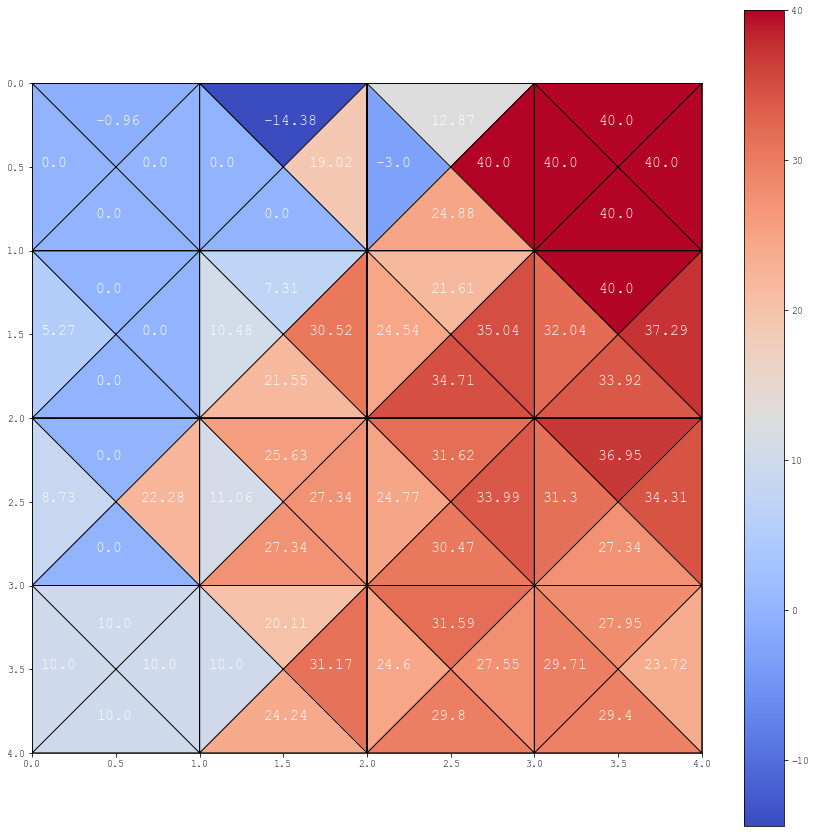

In [12]:
plot_q_table(grid_values_2)

## SARSA

#### Visualize maze rewards

#### Factor 1 

[[1.30697382e+00 2.83748509e-02 6.80581852e+00 6.15827499e-01]
 [5.71375437e-01 3.87867328e+01 1.18678935e+01 1.43120253e+00]
 [3.56665815e+01 7.98056558e+01 2.64846351e+01 2.25151127e+00]
 [4.00000000e+01 4.00000000e+01 4.00000000e+01 4.00000000e+01]
 [1.68932598e+00 1.14699013e+01 1.29855262e+01 5.67135127e+00]
 [1.21763675e+00 3.46030122e+01 1.48760479e+01 7.22802515e+00]
 [3.84305079e+01 5.49749512e+01 2.91470134e+01 1.59632686e+01]
 [7.99999946e+01 5.51424709e+01 3.86037902e+01 3.65621094e+01]
 [5.76027610e+00 1.46334065e+01 1.99946220e+01 1.23206611e+01]
 [1.42769174e+01 2.86987539e+01 1.66192681e+01 1.35362763e+01]
 [3.59818611e+01 3.99877007e+01 2.50909478e+01 1.83133828e+01]
 [5.56330624e+01 3.96427115e+01 3.21945207e+01 3.02509054e+01]
 [1.00000000e+01 1.00000000e+01 1.00000000e+01 1.00000000e+01]
 [1.77032204e+01 2.48586334e+01 1.72266641e+01 1.99999979e+01]
 [2.93942953e+01 3.25058370e+01 2.60580023e+01 1.76441407e+01]
 [3.98635354e+01 3.22470388e+01 3.19272491e+01 2.619357

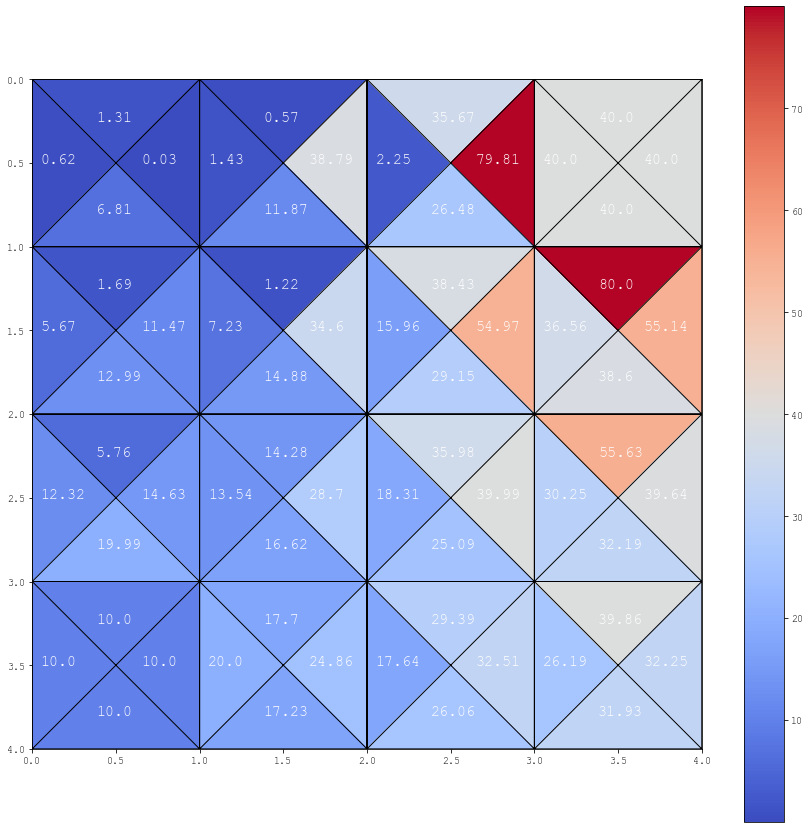

In [13]:
sarsa_1 = sarsa(env=env, discount_factor=1, alpha=0.01)
print(sarsa_1)
plot_q_table(sarsa_1)

#### Factor 0.9

[[ 5.31107077  5.92693113  9.50749167  5.5787228 ]
 [ 7.11249274 39.70590661 13.97560764  5.62080468]
 [37.33970726 76.0023331  27.01756708  8.80666322]
 [40.         40.         40.         40.        ]
 [ 5.92061034 14.77749258 12.86519804  9.69186219]
 [ 7.84073558 27.27944067 13.00361172  9.98678227]
 [38.91791372 42.82906939 18.18286599 14.13227   ]
 [76.00000005 44.12058804 25.79865555 27.71972293]
 [ 9.66969092 13.58430058 19.0026717  12.89820337]
 [14.2858115  18.20303265 11.19027381 12.91891942]
 [26.87243743 24.64769941 13.24918585 13.00128272]
 [43.66234591 22.8314082  16.13708531 17.98835432]
 [10.         10.         10.         10.        ]
 [13.07627578 13.15993698 10.52781608 19.00000032]
 [18.10492926 15.85167648 13.204887   10.98212484]
 [24.11494401 15.17560342 16.53275772 13.04091579]]


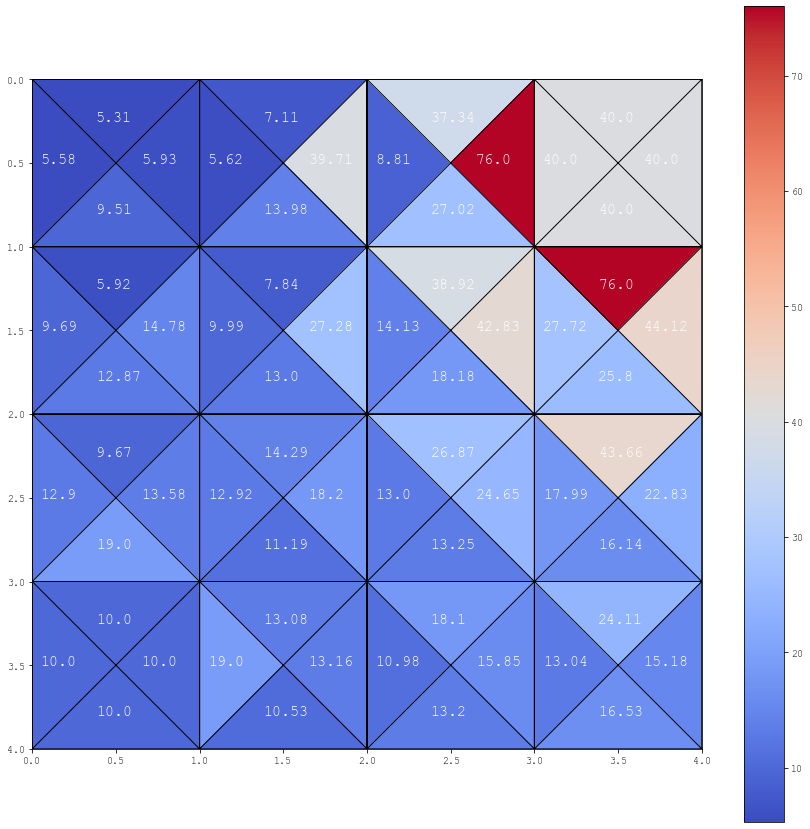

In [14]:
sarsa_2 = sarsa(env=env, discount_factor=0.9, alpha=0.01)
print(sarsa_2)
plot_q_table(sarsa_2)

## SARSAMAX, Q-Learning

#### Factor 1

[[10.27642538 23.42119178 47.14225759 13.28944294]
 [40.96625077 78.23725254 50.09678914 19.30335154]
 [74.15289797 79.99629945 71.28396972 53.82099826]
 [40.         40.         40.         40.        ]
 [19.49029576 75.44225285 36.5616779  36.09073464]
 [60.04796844 79.79075037 73.13158391 60.83145596]
 [79.85470273 79.9        79.65699905 79.58670484]
 [80.         79.89609923 79.79347166 79.79311863]
 [42.88996779 73.32846148 19.78569963 37.02095653]
 [78.15529432 79.69830409 76.05525579 63.11788496]
 [79.8        79.79963318 79.59895922 79.5850645 ]
 [79.9        79.78013265 79.67607374 79.68904111]
 [10.         10.         10.         10.        ]
 [79.32444925 79.59962678 77.36595053 19.99950855]
 [79.7        79.69999908 79.59999967 77.5991318 ]
 [79.79999992 79.69477301 79.68833161 79.58868963]]


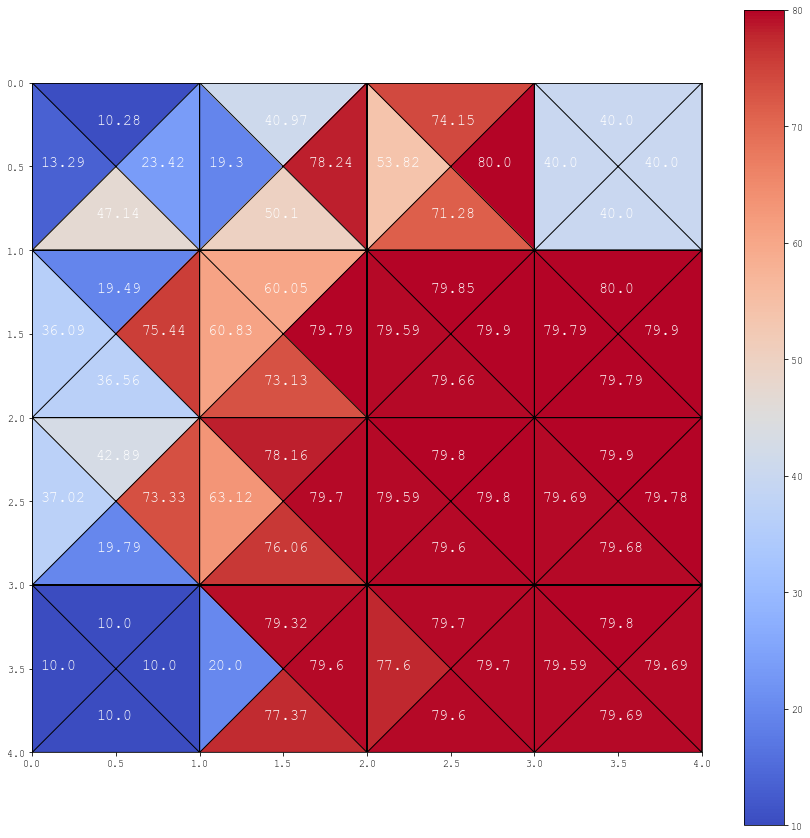

In [15]:
sarsaMAX1 = sarsaMAX(env=env, discount_factor=1, alpha=0.01)
print(sarsaMAX1)
plot_q_table(sarsaMAX1)

#### Factor 0.9

[[26.23210032 37.08541381 73.04052479 31.51028077]
 [56.72674788 79.82073239 68.19038879 47.34247726]
 [79.30690038 79.9999969  78.58810513 67.01655186]
 [40.         40.         40.         40.        ]
 [50.18300251 79.57604148 61.90307158 61.61202064]
 [69.02949427 79.7999993  79.06499842 77.8832478 ]
 [79.89996418 79.9        79.69999127 79.69996453]
 [80.         79.89999971 79.79999959 79.79999906]
 [67.30203166 79.40627555 19.92976889 67.13275724]
 [79.68411333 79.69999999 77.5782122  78.80368634]
 [79.8        79.8        79.6        79.59999989]
 [79.9        79.79999823 79.69999452 79.69999752]
 [10.         10.         10.         10.        ]
 [79.59967625 79.6        77.5997125  19.9999995 ]
 [79.7        79.7        79.6        77.6       ]
 [79.8        79.69999981 79.6999992  79.59999953]]


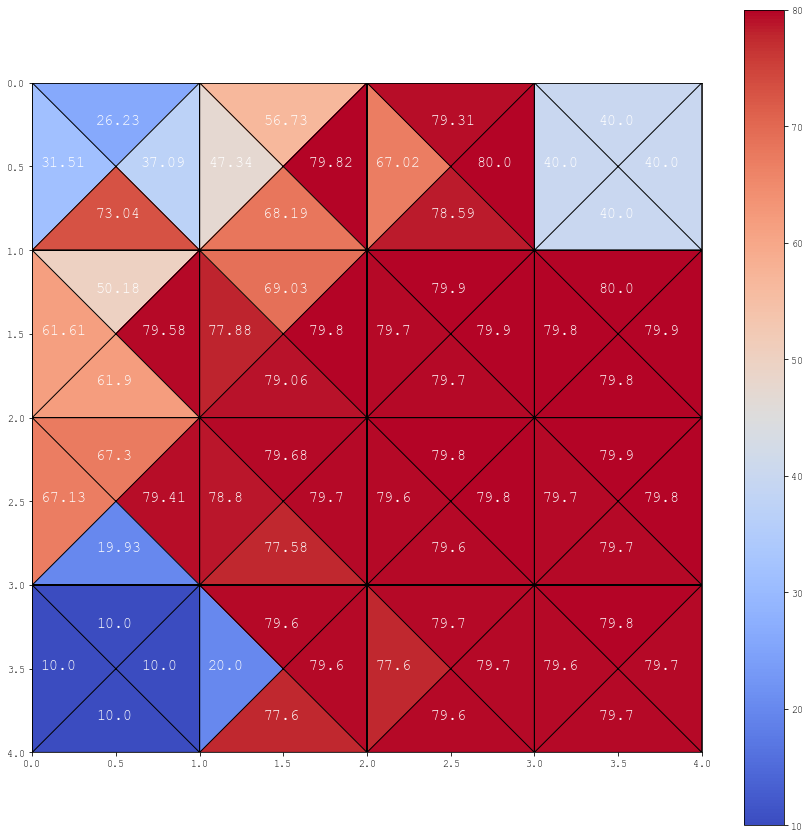

In [16]:
sarsaMAX2 = sarsaMAX(env=env, discount_factor=1, alpha=0.01)
print(sarsaMAX2)
plot_q_table(sarsaMAX2)